# Question 2  (Alejandro A. - 301195788)
---

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

---

## 1. Generate Swiss Roll

In [2]:
X, y = make_swiss_roll(n_samples=1500, random_state=0)

In [7]:
print(X.shape)
print(y.shape)

(1500, 3)
(1500,)


---

## 2. Plot Swiss Roll

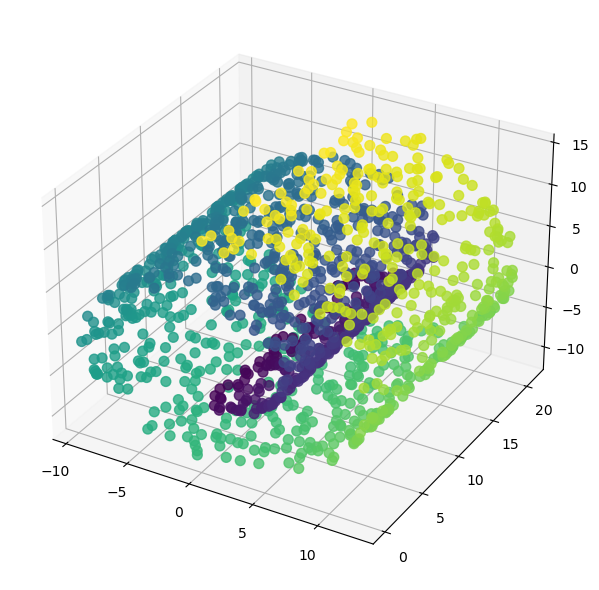

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=50, alpha=0.8)
plt.tight_layout()
plt.show()

---

## 3. Use kPCA with linear, rbf, and sigmoid kernels

In [32]:
pca_linear = KernelPCA(n_components=2, kernel='linear')
pca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
pca_sigmoid = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.04)

In [33]:
X_reduced_linear = pca_linear.fit_transform(X)
X_reduced_rbf = pca_rbf.fit_transform(X)
X_reduced_sigmoid = pca_sigmoid.fit_transform(X)

---

## 4. Plot results, explain, and compare

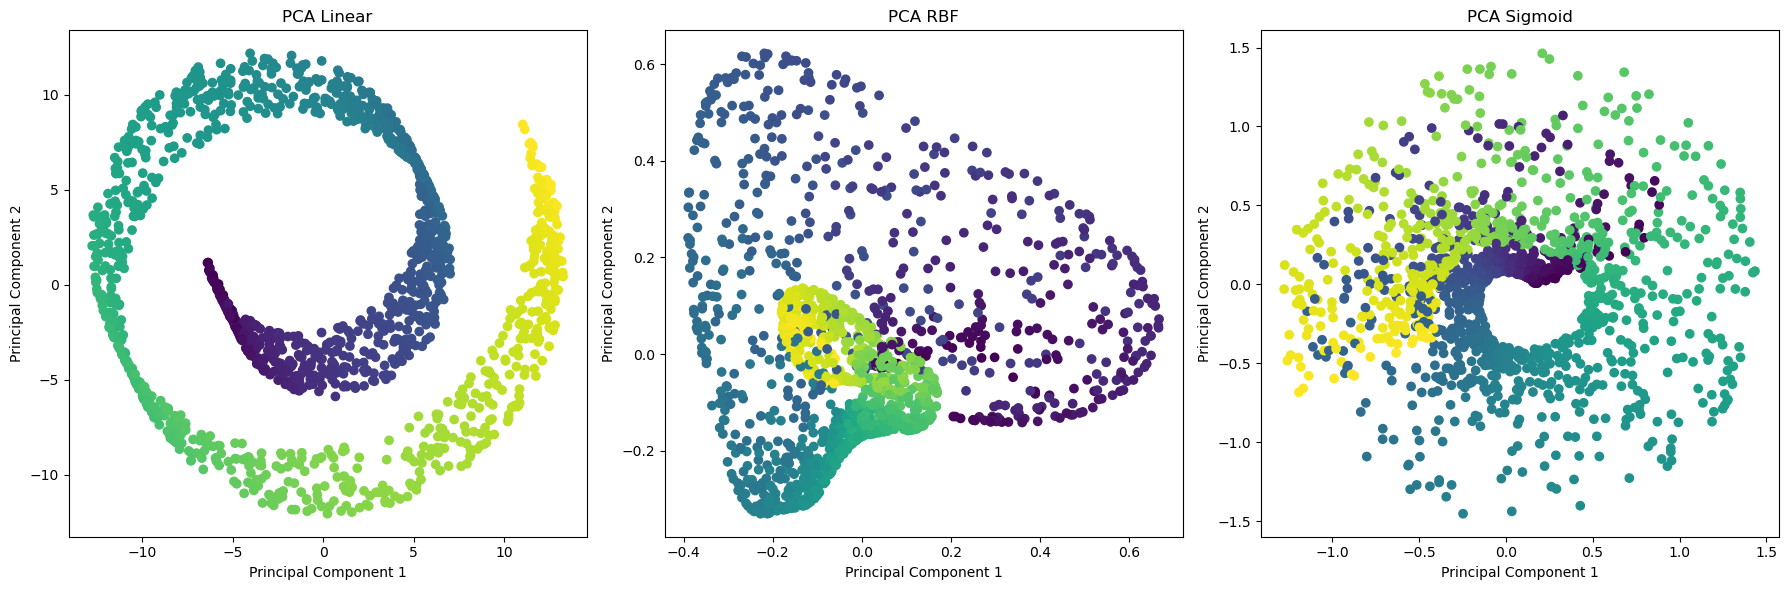

In [34]:
fig = plt.figure(figsize=(18,6))

# Linear
ax1 = fig.add_subplot(131)
ax1.scatter(X_reduced_linear[:, 0], X_reduced_linear[:, 1], c=y)
ax1.set_title('PCA Linear')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

# RBF
ax2 = fig.add_subplot(132)
ax2.scatter(X_reduced_rbf[:, 0], X_reduced_rbf[:, 1], c=y)
ax2.set_title('PCA RBF')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

# Sigmoid
ax3 = fig.add_subplot(133)
ax3.scatter(X_reduced_sigmoid[:, 0], X_reduced_sigmoid[:, 1], c=y)
ax3.set_title('PCA Sigmoid')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

---

## 5. Apply Logistic Regression and GridSearchCV

In [36]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y.astype(int))

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [37]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'sigmoid'}


In [38]:
print(grid_search.best_score_)

0.7306666666666667


---

## 6. Plot results from GridSearchCV

In [44]:
results = grid_search.cv_results_

In [45]:
gamma_vals = results['param_kpca__gamma'].data
kernel_vals = results['param_kpca__kernel'].data

mean_test_scores = results['mean_test_score']
kernels = np.unique(kernel_vals)

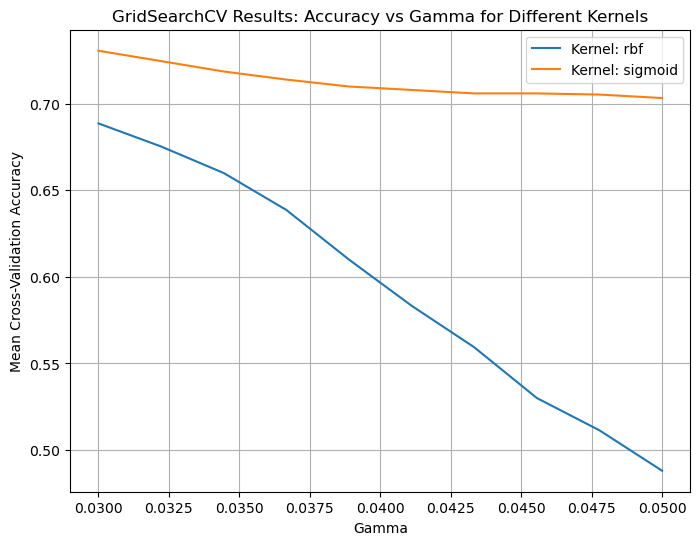

In [47]:
plt.figure(figsize=(8, 6))

for kernel in kernels:
    # Get the mask for the current kernel
    mask = (kernel_vals == kernel)
    
    # Plot gamma vs mean cross-validation score for this kernel
    plt.plot(gamma_vals[mask], mean_test_scores[mask], label=f'Kernel: {kernel}')

# Customize the plot
plt.xlabel('Gamma')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('GridSearchCV Results: Accuracy vs Gamma for Different Kernels')
plt.legend()
plt.grid(True)
plt.show()

---